<a href="https://colab.research.google.com/github/KeishinRyuu/python-practice/blob/main/Python%E3%81%AB%E3%82%88%E3%82%8B%E6%95%B0%E7%90%86%E8%A7%A3%E6%9E%90(%E5%89%8D%E5%8D%8A%E8%AA%B2%E9%A1%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 課題1
ボールを投げる場合を考える。
$t = 0$において$v_x = 10$ [m/sec]， $v_y =0$ [m/sec], $x=0$ [m], $y = 100$ [m]
とした時の，ボールの軌跡を残しながらアニメーションとエネルギーのアニメーションを同時表示しなさい。時間の刻み幅は $dt=0.01$ secで考えなさい。ただし，全ての点をプロットすると非常に時間がかかるため，プロットは50点(0.5 sec)おきにするものとする。

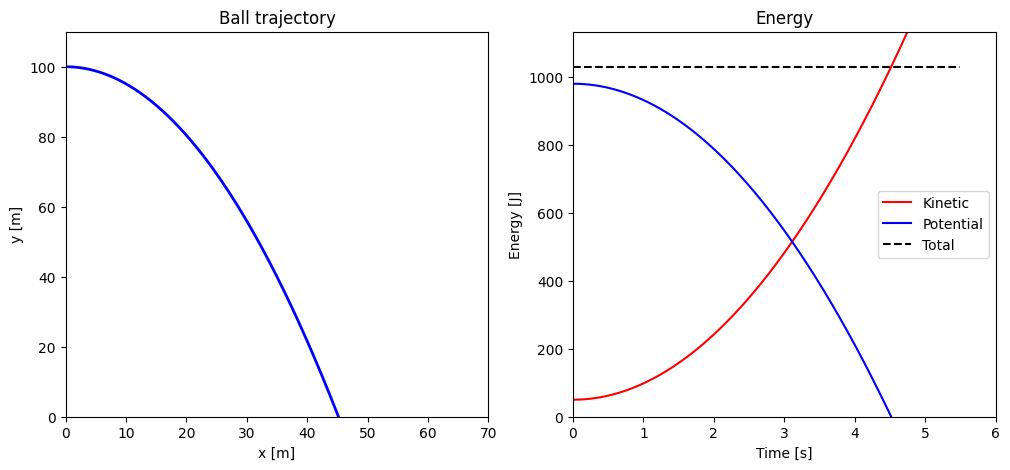

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
# 物理定数
g = 9.8        # 重力加速度 [m/s^2]
m = 1.0        # 質量 [kg]

# 初期条件
vx0 = 10.0     # [m/s]
vy0 = 0.0      # [m/s]
x0 = 0.0       # [m]
y0 = 100.0     # [m]

# 時間設定
dt = 0.01
t_max = 6.0
t = np.arange(0, t_max, dt)
x = x0 + vx0 * t
y = y0 + vy0 * t - 0.5 * g * t**2
vy = vy0 - g * t
vx = vx0 * np.ones_like(t)
# 運動エネルギー
K = 0.5 * m * (vx**2 + vy**2)

# 位置エネルギー
U = m * g * y

# 全エネルギー
E = K + U
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.set_xlim(0, 70)
ax1.set_ylim(0, 110)
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")
ax1.set_title("Ball trajectory")

traj, = ax1.plot([], [], 'b-', lw=2)
point, = ax1.plot([], [], 'ro')
ax2.set_xlim(0, t_max)
ax2.set_ylim(0, max(E) * 1.1)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Energy [J]")
ax2.set_title("Energy")

k_line, = ax2.plot([], [], 'r-', label='Kinetic')
u_line, = ax2.plot([], [], 'b-', label='Potential')
e_line, = ax2.plot([], [], 'k--', label='Total')

ax2.legend()
def init():
    traj.set_data([], [])
    point.set_data([], [])
    k_line.set_data([], [])
    u_line.set_data([], [])
    e_line.set_data([], [])
    return traj, point, k_line, u_line, e_line
def update(frame):
    i = frame * 50
    if i >= len(t):
        i = len(t) - 1

    # 軌跡（sequence OK）
    traj.set_data(x[:i], y[:i])

    # 点（★必ず sequence にする）
    point.set_data([x[i]], [y[i]])

    # エネルギー
    k_line.set_data(t[:i], K[:i])
    u_line.set_data(t[:i], U[:i])
    e_line.set_data(t[:i], E[:i])

    return traj, point, k_line, u_line, e_line

frames = len(t) // 50

ani = animation.FuncAnimation(
    fig,
    update,
    frames=frames,
    init_func=init,
    interval=50,
    blit=True
)

HTML(ani.to_jshtml())



# 課題2
長さが10の1次元の棒における熱伝導を考える。時刻$t = 0$において，左端の温度を$T=255$ 度，その以外の領域の温度が0 度であるとする。$t>0$において左端を熱するのをやめ，右端も浮かせ，断熱状態(外部からの熱の出入りが遮断されている状態)とする。255 度で保った時の$t=300$における一次元棒の温度分布を横軸を位置、縦軸を温度としたグラフとして示しなさい。拡散係数は$D=0.1$であるとする。$\Delta t = 1$，$\Delta x =1$とする。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 課題3
縦25x横50のピクセルサイズでの2次元のインクの拡散を考える。時刻$t=0$で$(x, y)=(25, 10)$に$10^5$個の赤い粒子を導入したとき，$t=100$における粒子の分布を図として表しなさい。ただし，拡散係数は$D=0.2$，$\Delta t = 1$，また$\Delta x = \Delta y =1$とする。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
